## Average Supply of Protein Of Animal Origin

### Checking the structure of the data

In [58]:
# Importing Libraries

import numpy as np
import pandas as pd
import os
import copy

# Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [59]:
# Identifying current directory

current_directory = os.getcwd()
print(current_directory)

/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/All about Manchester/My Course/Dissertation/Notebooks/Figures


In [60]:
# Changing current directory to the path consisting Datasets

os.chdir("/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/All about Manchester/My Course/Dissertation/FAO_Latest")

In [61]:
# Reading the dataset into a dataframe

protein_supply_df = pd.read_csv("FAOSTAT_data_Average Supply of protein.csv")
protein_supply_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20002002,2000-2002,g/pc/d,13.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20012003,2001-2003,g/pc/d,12.7,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20022004,2002-2004,g/pc/d,13.3,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20032005,2003-2005,g/pc/d,13.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20042006,2004-2006,g/pc/d,12.3,E,Estimated value,NaN


In [62]:
protein_supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3374 non-null   object 
 1   Domain            3374 non-null   object 
 2   Area Code (M49)   3374 non-null   int64  
 3   Area              3374 non-null   object 
 4   Element Code      3374 non-null   int64  
 5   Element           3374 non-null   object 
 6   Item Code         3374 non-null   int64  
 7   Item              3374 non-null   object 
 8   Year Code         3374 non-null   int64  
 9   Year              3374 non-null   object 
 10  Unit              3374 non-null   object 
 11  Value             3374 non-null   float64
 12  Flag              3374 non-null   object 
 13  Flag Description  3374 non-null   object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(4), object(9)
memory usage: 395.5+ KB


In [63]:
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [64]:
protein_supply_df['Area'].value_counts()

Afghanistan                                             19
Jordan                                                  19
Mozambique                                              19
Myanmar                                                 19
Namibia                                                 19
Nepal                                                   19
Netherlands (Kingdom of the)                            19
New Caledonia                                           19
New Zealand                                             19
Nicaragua                                               19
Niger                                                   19
Nigeria                                                 19
North Macedonia                                         19
Norway                                                  19
Oman                                                    19
Pakistan                                                19
Panama                                                  

In [65]:
print("Total countries: ", protein_supply_df['Area'].nunique())
print("Total range of years covered: ", protein_supply_df['Year'].nunique())

Total countries:  188
Total range of years covered:  19


In [66]:
# Reset the pandas options to their default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

### Data Cleaning and Preparation

In [67]:
# Extracting the latest year from the range of 3 years given in the column 'Year'

protein_supply_df['Last_Year'] = protein_supply_df['Year'].str.split('-').str[1]
protein_supply_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Last_Year
0,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20002002,2000-2002,g/pc/d,13.0,E,Estimated value,NaN,2002
1,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20012003,2001-2003,g/pc/d,12.7,E,Estimated value,NaN,2003
2,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20022004,2002-2004,g/pc/d,13.3,E,Estimated value,NaN,2004
3,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20032005,2003-2005,g/pc/d,13.0,E,Estimated value,NaN,2005
4,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/...,20042006,2004-2006,g/pc/d,12.3,E,Estimated value,NaN,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,FS,Suite of Food Security Indicators,716,Zimbabwe,6123,Value,21014,Average supply of protein of animal origin (g/...,20142016,2014-2016,g/pc/d,26.0,E,Estimated value,NaN,2016
3370,FS,Suite of Food Security Indicators,716,Zimbabwe,6123,Value,21014,Average supply of protein of animal origin (g/...,20152017,2015-2017,g/pc/d,26.0,E,Estimated value,NaN,2017
3371,FS,Suite of Food Security Indicators,716,Zimbabwe,6123,Value,21014,Average supply of protein of animal origin (g/...,20162018,2016-2018,g/pc/d,25.3,E,Estimated value,NaN,2018
3372,FS,Suite of Food Security Indicators,716,Zimbabwe,6123,Value,21014,Average supply of protein of animal origin (g/...,20172019,2017-2019,g/pc/d,25.0,E,Estimated value,NaN,2019


In [68]:
# Finding the countries with missing values on protein supply

missing_data = protein_supply_df[protein_supply_df['Value'].isnull()]['Area'].value_counts()
# missing_data = protein_supply_df['Area'].loc[protein_supply_df['Value'].isnull()].value_counts()
missing_data

Series([], Name: Area, dtype: int64)

In [69]:
# Countries with missing values > 10 i.e. more than half missing

countries_without_data = missing_data[missing_data > 6].index.tolist()
print("Number of countries without more than 50% missing data on animal protein supply: ", len(countries_without_data))

countries_without_data

Number of countries without more than 50% missing data on animal protein supply:  0


[]

In [70]:
# # Dropping rows for the countries with greater than equal to 10 missing values (i.e. equal to or, more than half missing)

# protein_supply_df = protein_supply_df[~protein_supply_df['Area'].isin(countries_without_data)]
# protein_supply_df.info()

In [71]:
# # Data after dropping rows based on countries with more than 50% missing protein supply values

# print("Total countries: ", protein_supply_df['Area'].nunique())
# print("Total range of years covered: ", protein_supply_df['Year'].nunique())

In [72]:
# Based on above analysis it is observed that values for 2018-2020 and 2019-2021 are missing for all countries

missing_data = protein_supply_df[protein_supply_df['Value'].isnull()]['Year'].value_counts()
missing_data

Series([], Name: Year, dtype: int64)

In [73]:
# Protein Supply data missing for years 2018-2020 and 2019-2021

years_without_data = missing_data[missing_data >2].index.tolist()
print("Years without any data on animal protein supply: ", len(years_without_data))
years_without_data


Years without any data on animal protein supply:  0


[]

In [74]:
# # Dropping rows for the years 2018-2020 and 2019-2021

# protein_supply_df = protein_supply_df[~protein_supply_df['Year'].isin(years_without_data)]
# protein_supply_df.info()

In [75]:
# Drop the column Note

protein_supply_df.drop(['Note'], axis = 1, inplace= True)

In [76]:
# Data after dropping rows based on countries with more than 50% missing protein supply values

print("Total countries: ", protein_supply_df['Area'].nunique())
print("Total range of years covered: ", protein_supply_df['Year'].nunique())

Total countries:  188
Total range of years covered:  19


In [77]:
protein_supply_df[protein_supply_df['Value'].isnull()]['Area'].value_counts()

Series([], Name: Area, dtype: int64)

In [78]:
protein_supply_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Value
count,3374.000000,3374.0,3374.0,3.374000e+03,3374.000000
mean,422.794902,6123.0,21014.0,2.009326e+07,35.222347
std,251.283358,0.0,0.0,5.479342e+04,20.140389
min,4.000000,6123.0,21014.0,2.000200e+07,0.700000
25%,204.000000,6123.0,21014.0,2.004201e+07,17.300000
50%,415.500000,6123.0,21014.0,2.009201e+07,33.000000
75%,642.000000,6123.0,21014.0,2.014202e+07,50.700000
max,894.000000,6123.0,21014.0,2.018202e+07,104.700000


### Exploratory Data Analysis

In [79]:
filtered_df = protein_supply_df[protein_supply_df['Last_Year'].isin(['2002', '2019'])]

In [80]:
# Changing current directory to the path consisting Datasets

os.chdir("/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/All about Manchester/My Course/Dissertation/Notebooks/Figures")

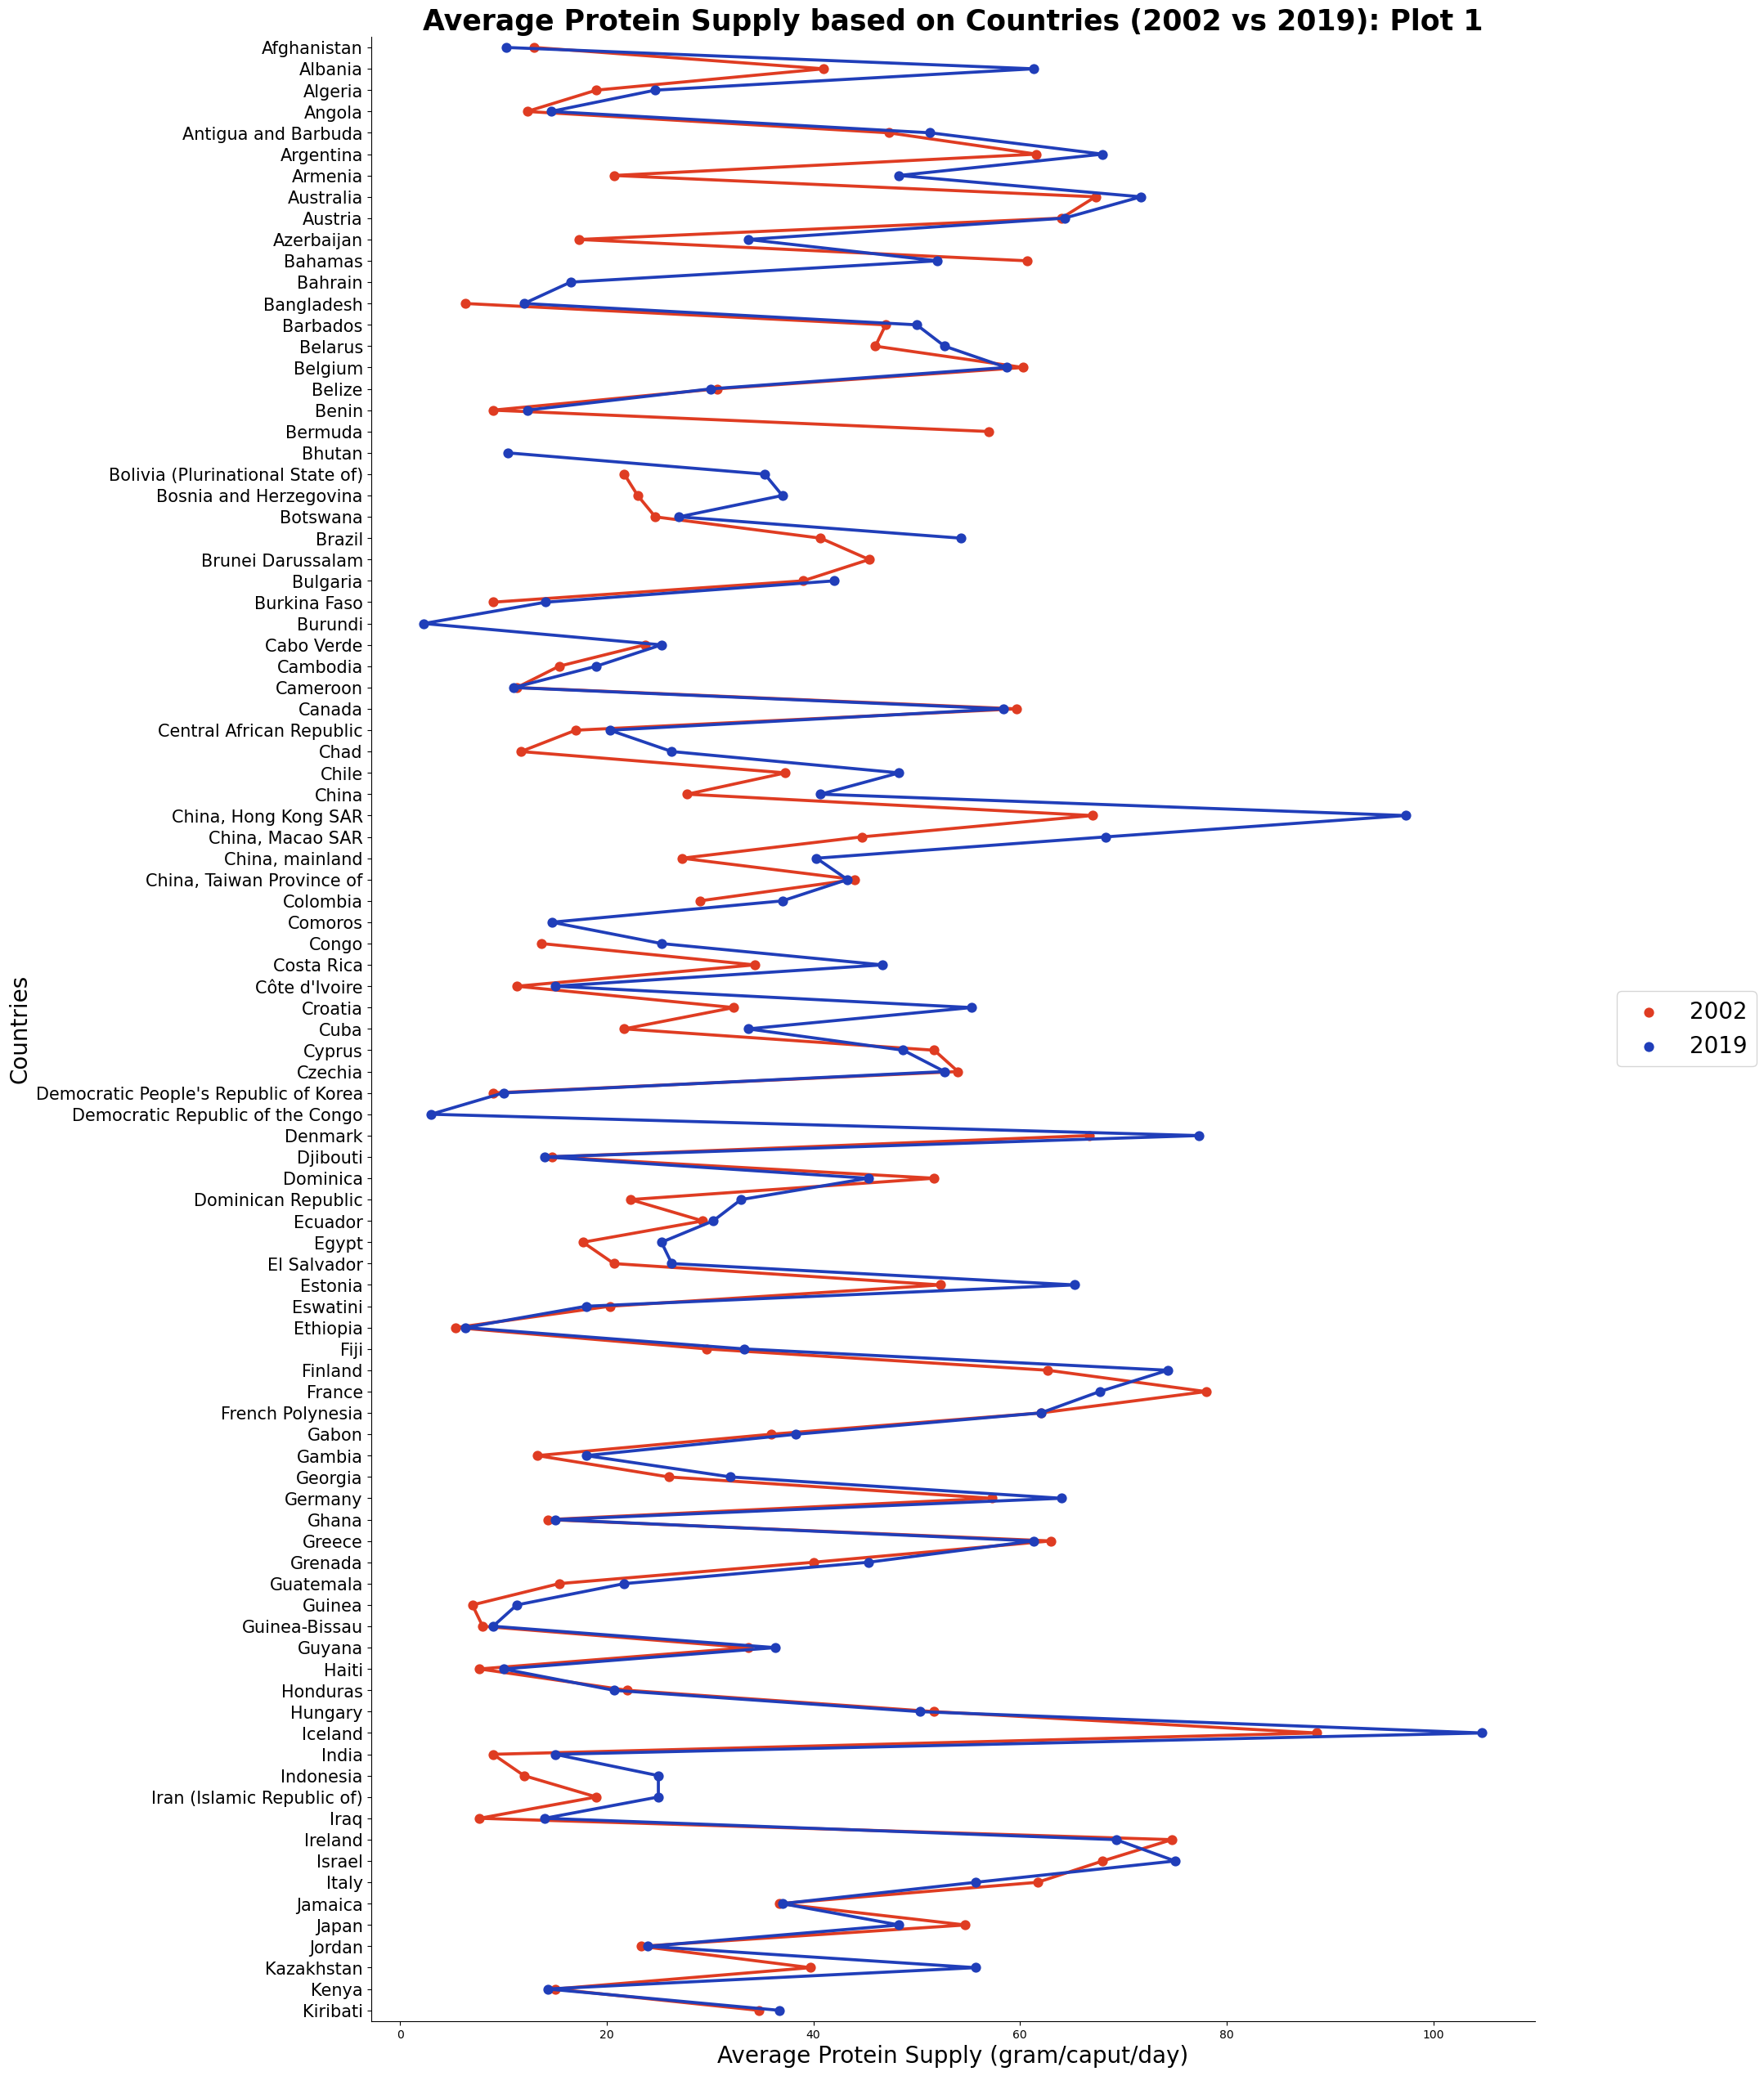

In [81]:
color2 = ['#DF3C22','#203EB9']

sns.catplot(x = 'Value', y ='Area',data = filtered_df[:179],hue = 'Last_Year',height = 25, aspect = 0.7, palette = color2,kind = 'point', alpha = 0.5, legend_out = False)
plt.xlabel("Average Protein Supply (gram/caput/day)",fontsize= 20)
plt.ylabel("Countries",fontsize= 20)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20, loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.title("Average Protein Supply based on Countries (2002 vs 2019): Plot 1",fontweight="bold",fontsize=25)
plt.savefig('AverageProteinSupplybyCountryPlot1.svg')
plt.show()

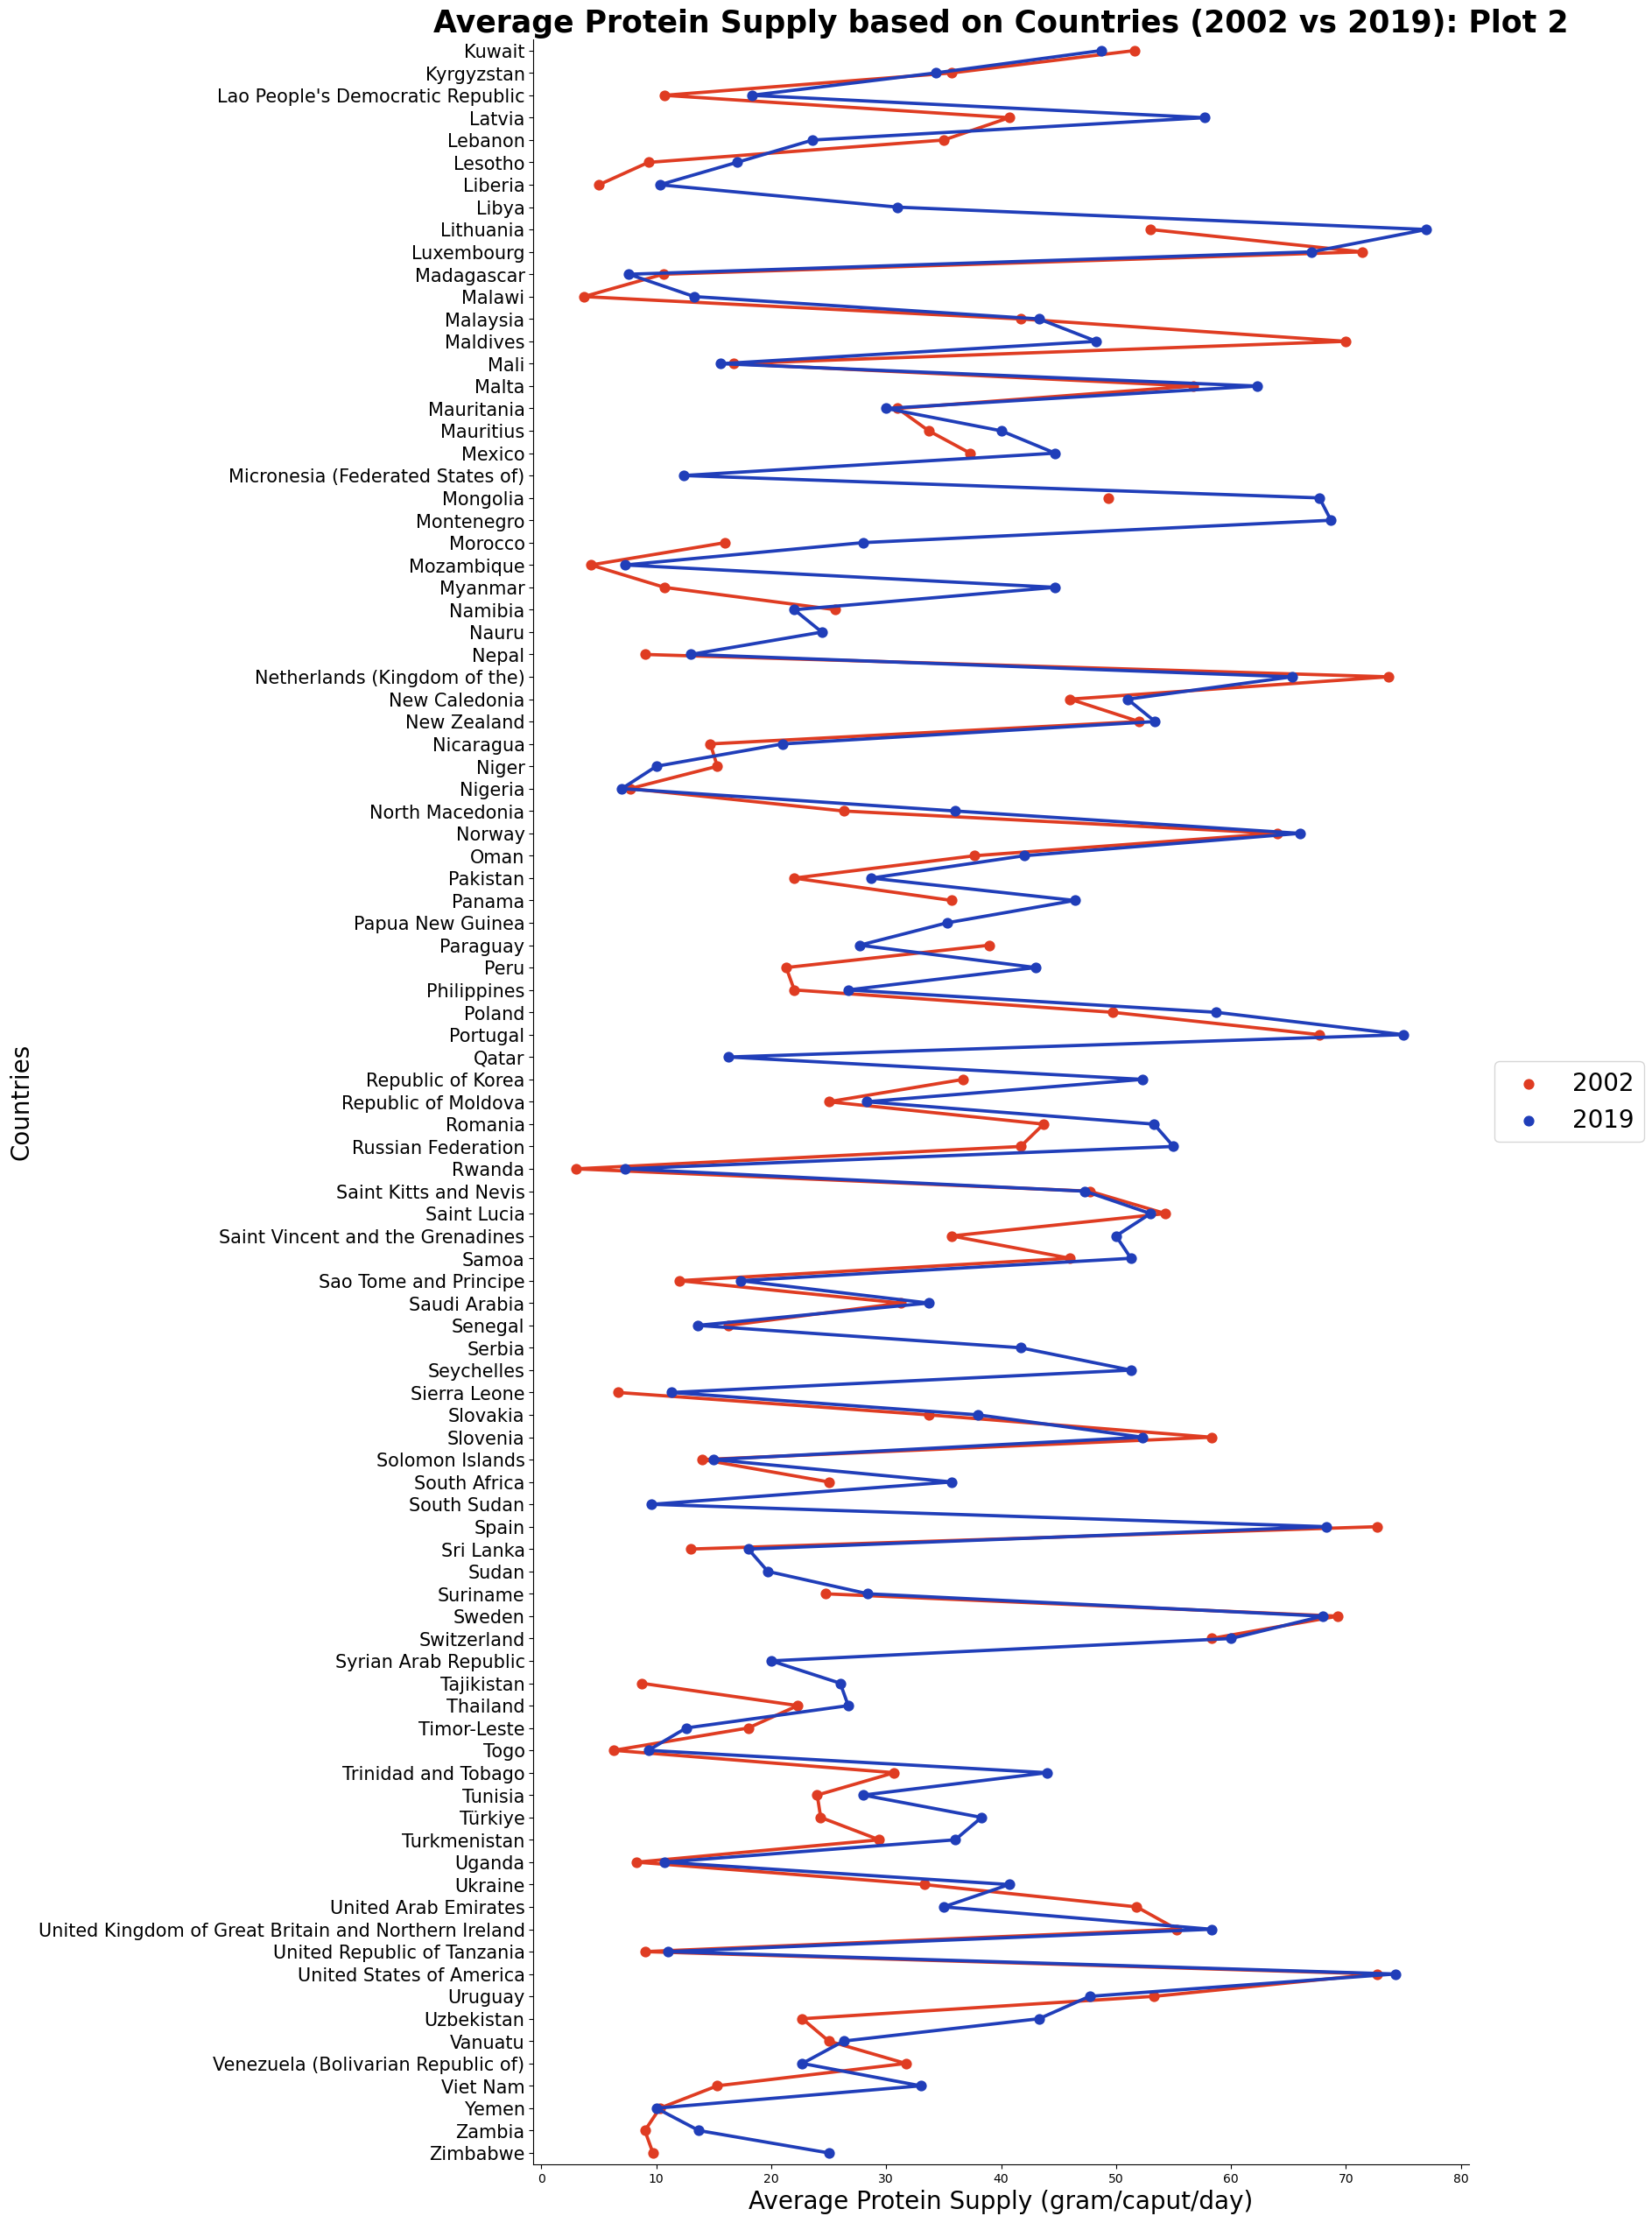

In [82]:
color2 = ['#DF3C22','#203EB9']

sns.catplot(x = 'Value', y ='Area',data = filtered_df[179:],hue = 'Last_Year',height = 25, aspect = 0.6, palette = color2,kind = 'point', alpha = 0.7, legend_out = False)
plt.xlabel("Average Protein Supply (gram/caput/day)",fontsize= 20)
plt.ylabel("Countries",fontsize= 20)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20, loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.title("Average Protein Supply based on Countries (2002 vs 2019): Plot 2",fontweight="bold",fontsize=25)
plt.savefig('AverageProteinSupplybyCountryPlot2.svg')
plt.show()

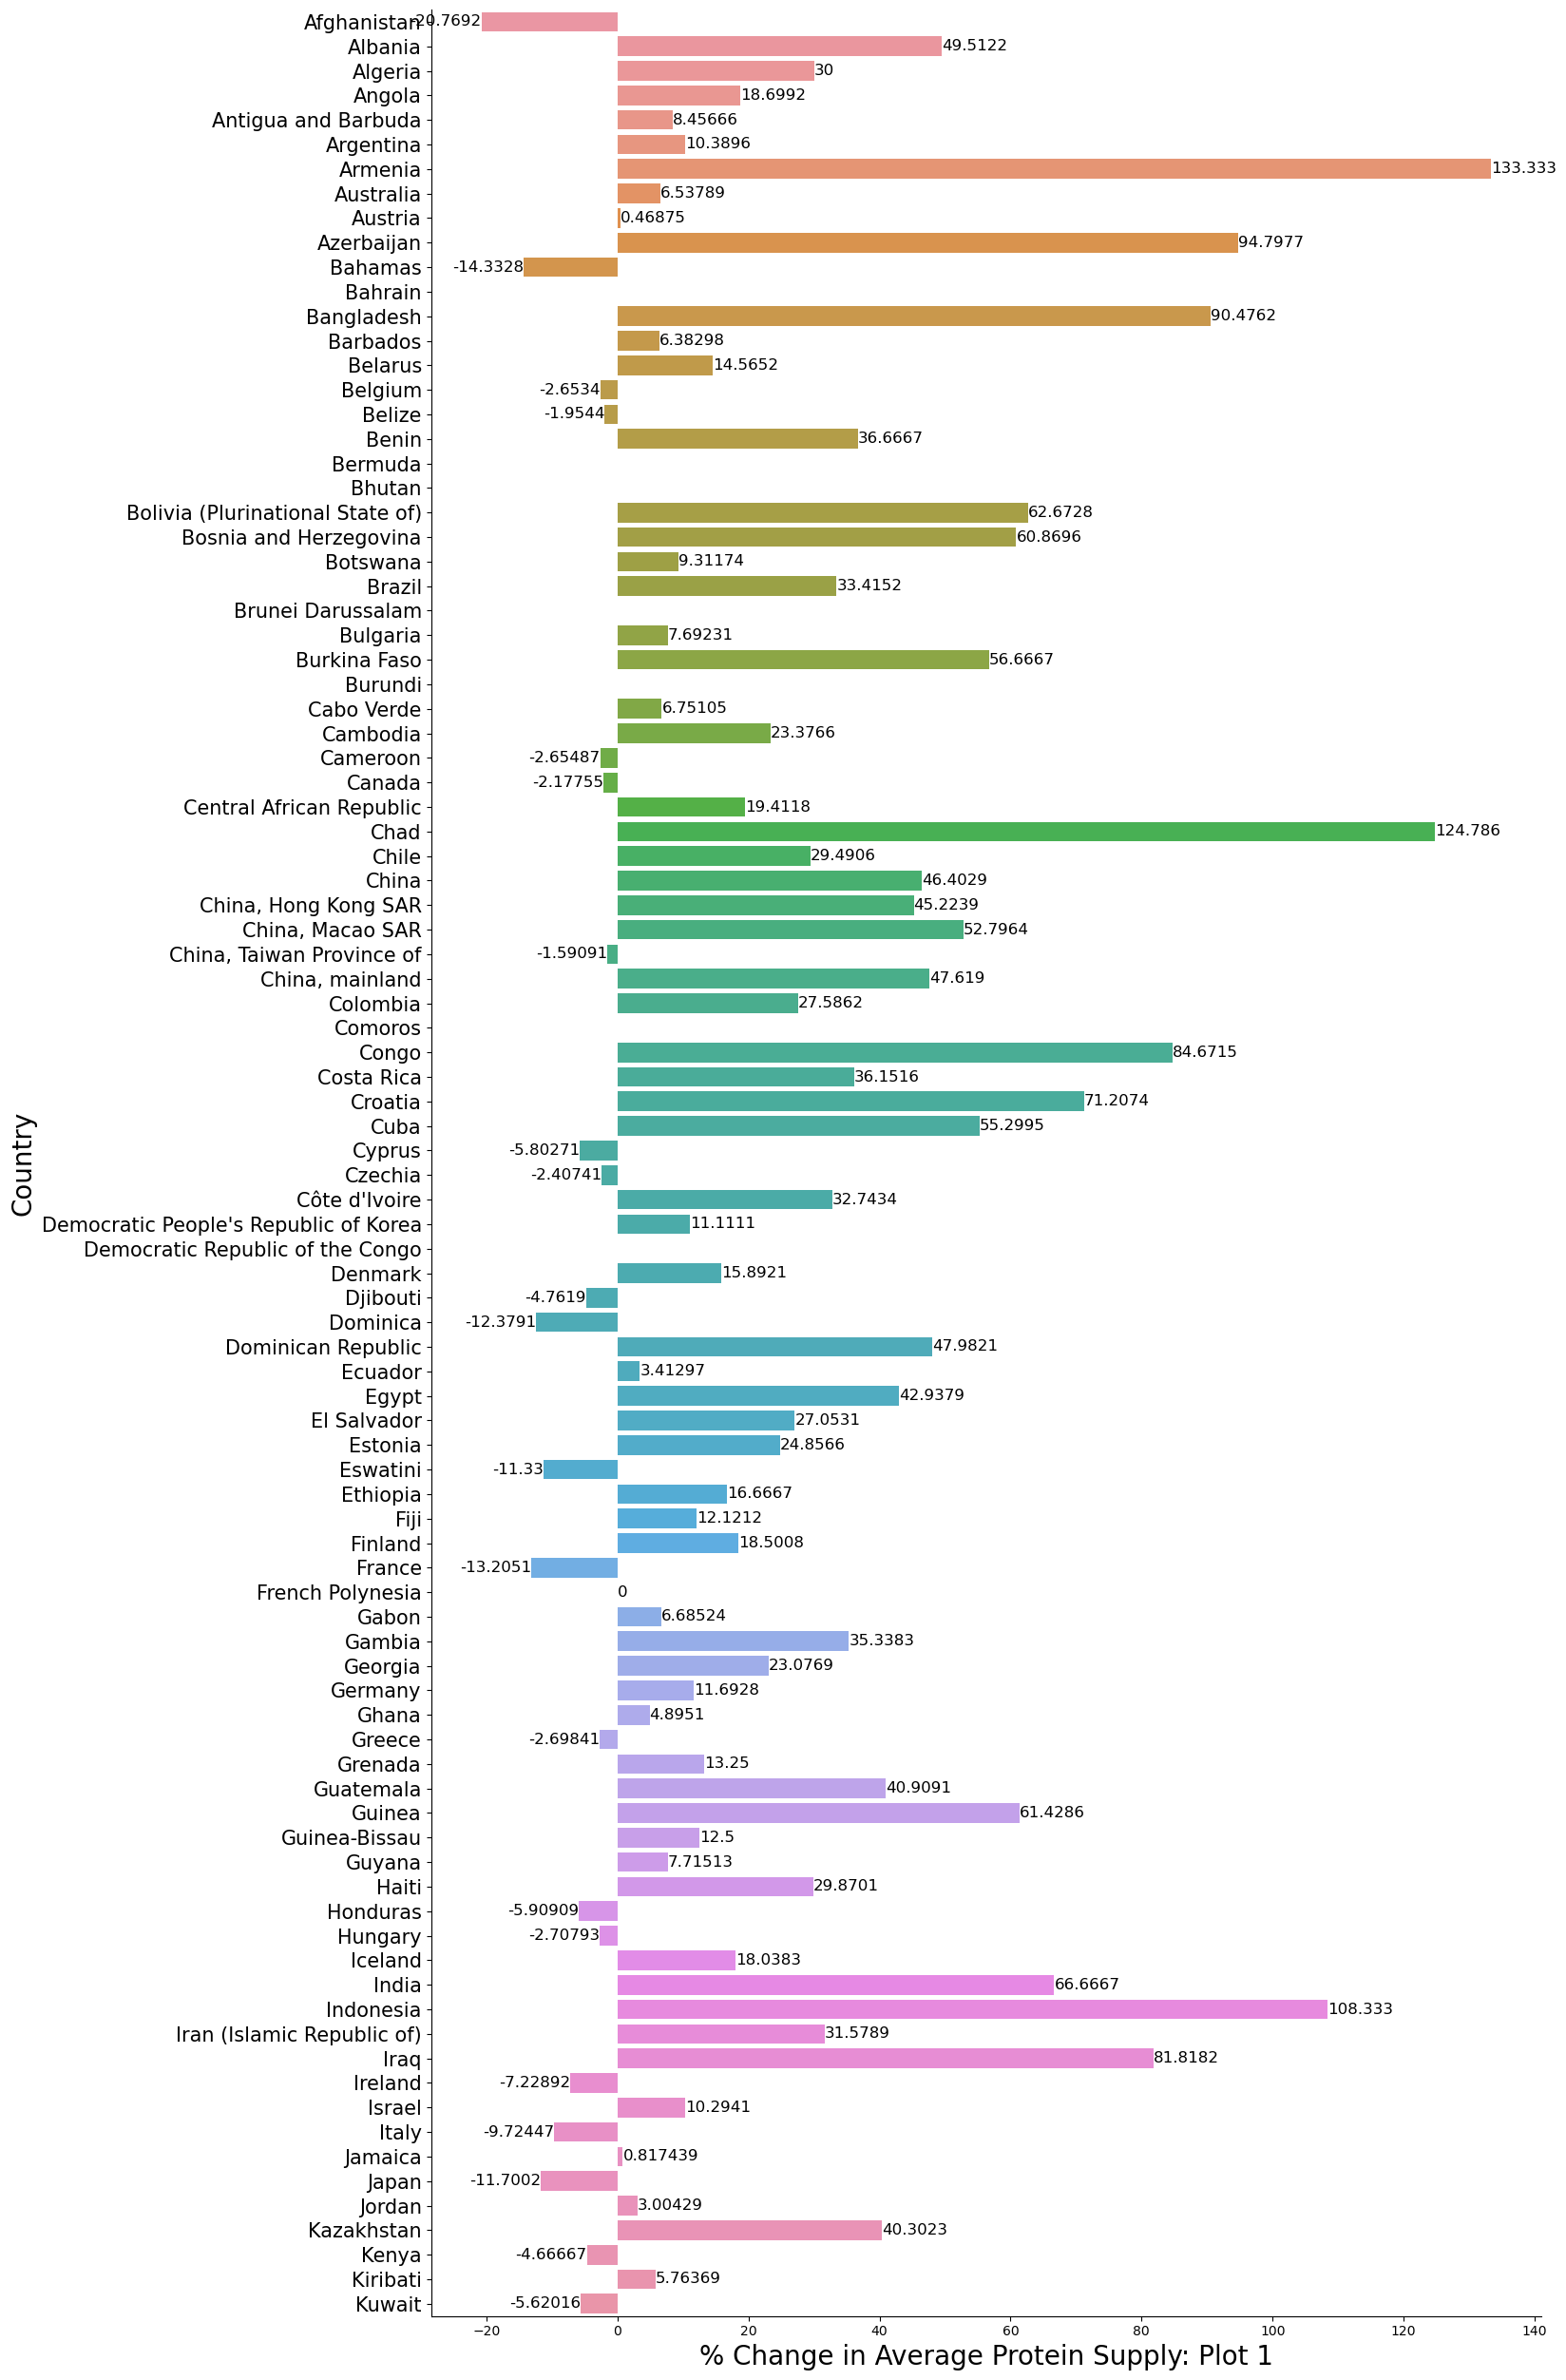

In [86]:
# Create the catplot with 'Country' and 'Percentage_Increase' columns
fig1 = sns.catplot(y='Area', x='Percentage_Increase',height = 25, aspect = 0.6, data=df_pivot[:94], kind='bar')
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fig1.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [v.get_height() for v in c]
    ax.bar_label(c, label_type='edge', fontsize = 12)


# Set labels and title
plt.ylabel('Country', fontsize = 20)
plt.xlabel('% Change in Average Protein Supply: Plot 1',fontsize = 20)

plt.yticks(fontsize=15)

# plt.savefig("Percentage_Change_Avg_Protein_Supply_Plot1.eps", dpi = 300)
plt.savefig("Percentage_Change_Avg_Protein_Supply_Plot1.svg")

# Display the plot
plt.show()

In [83]:
# filtered_df.loc[:, 'Area'] = filtered_df.loc[:, 'Area'].astype(str)

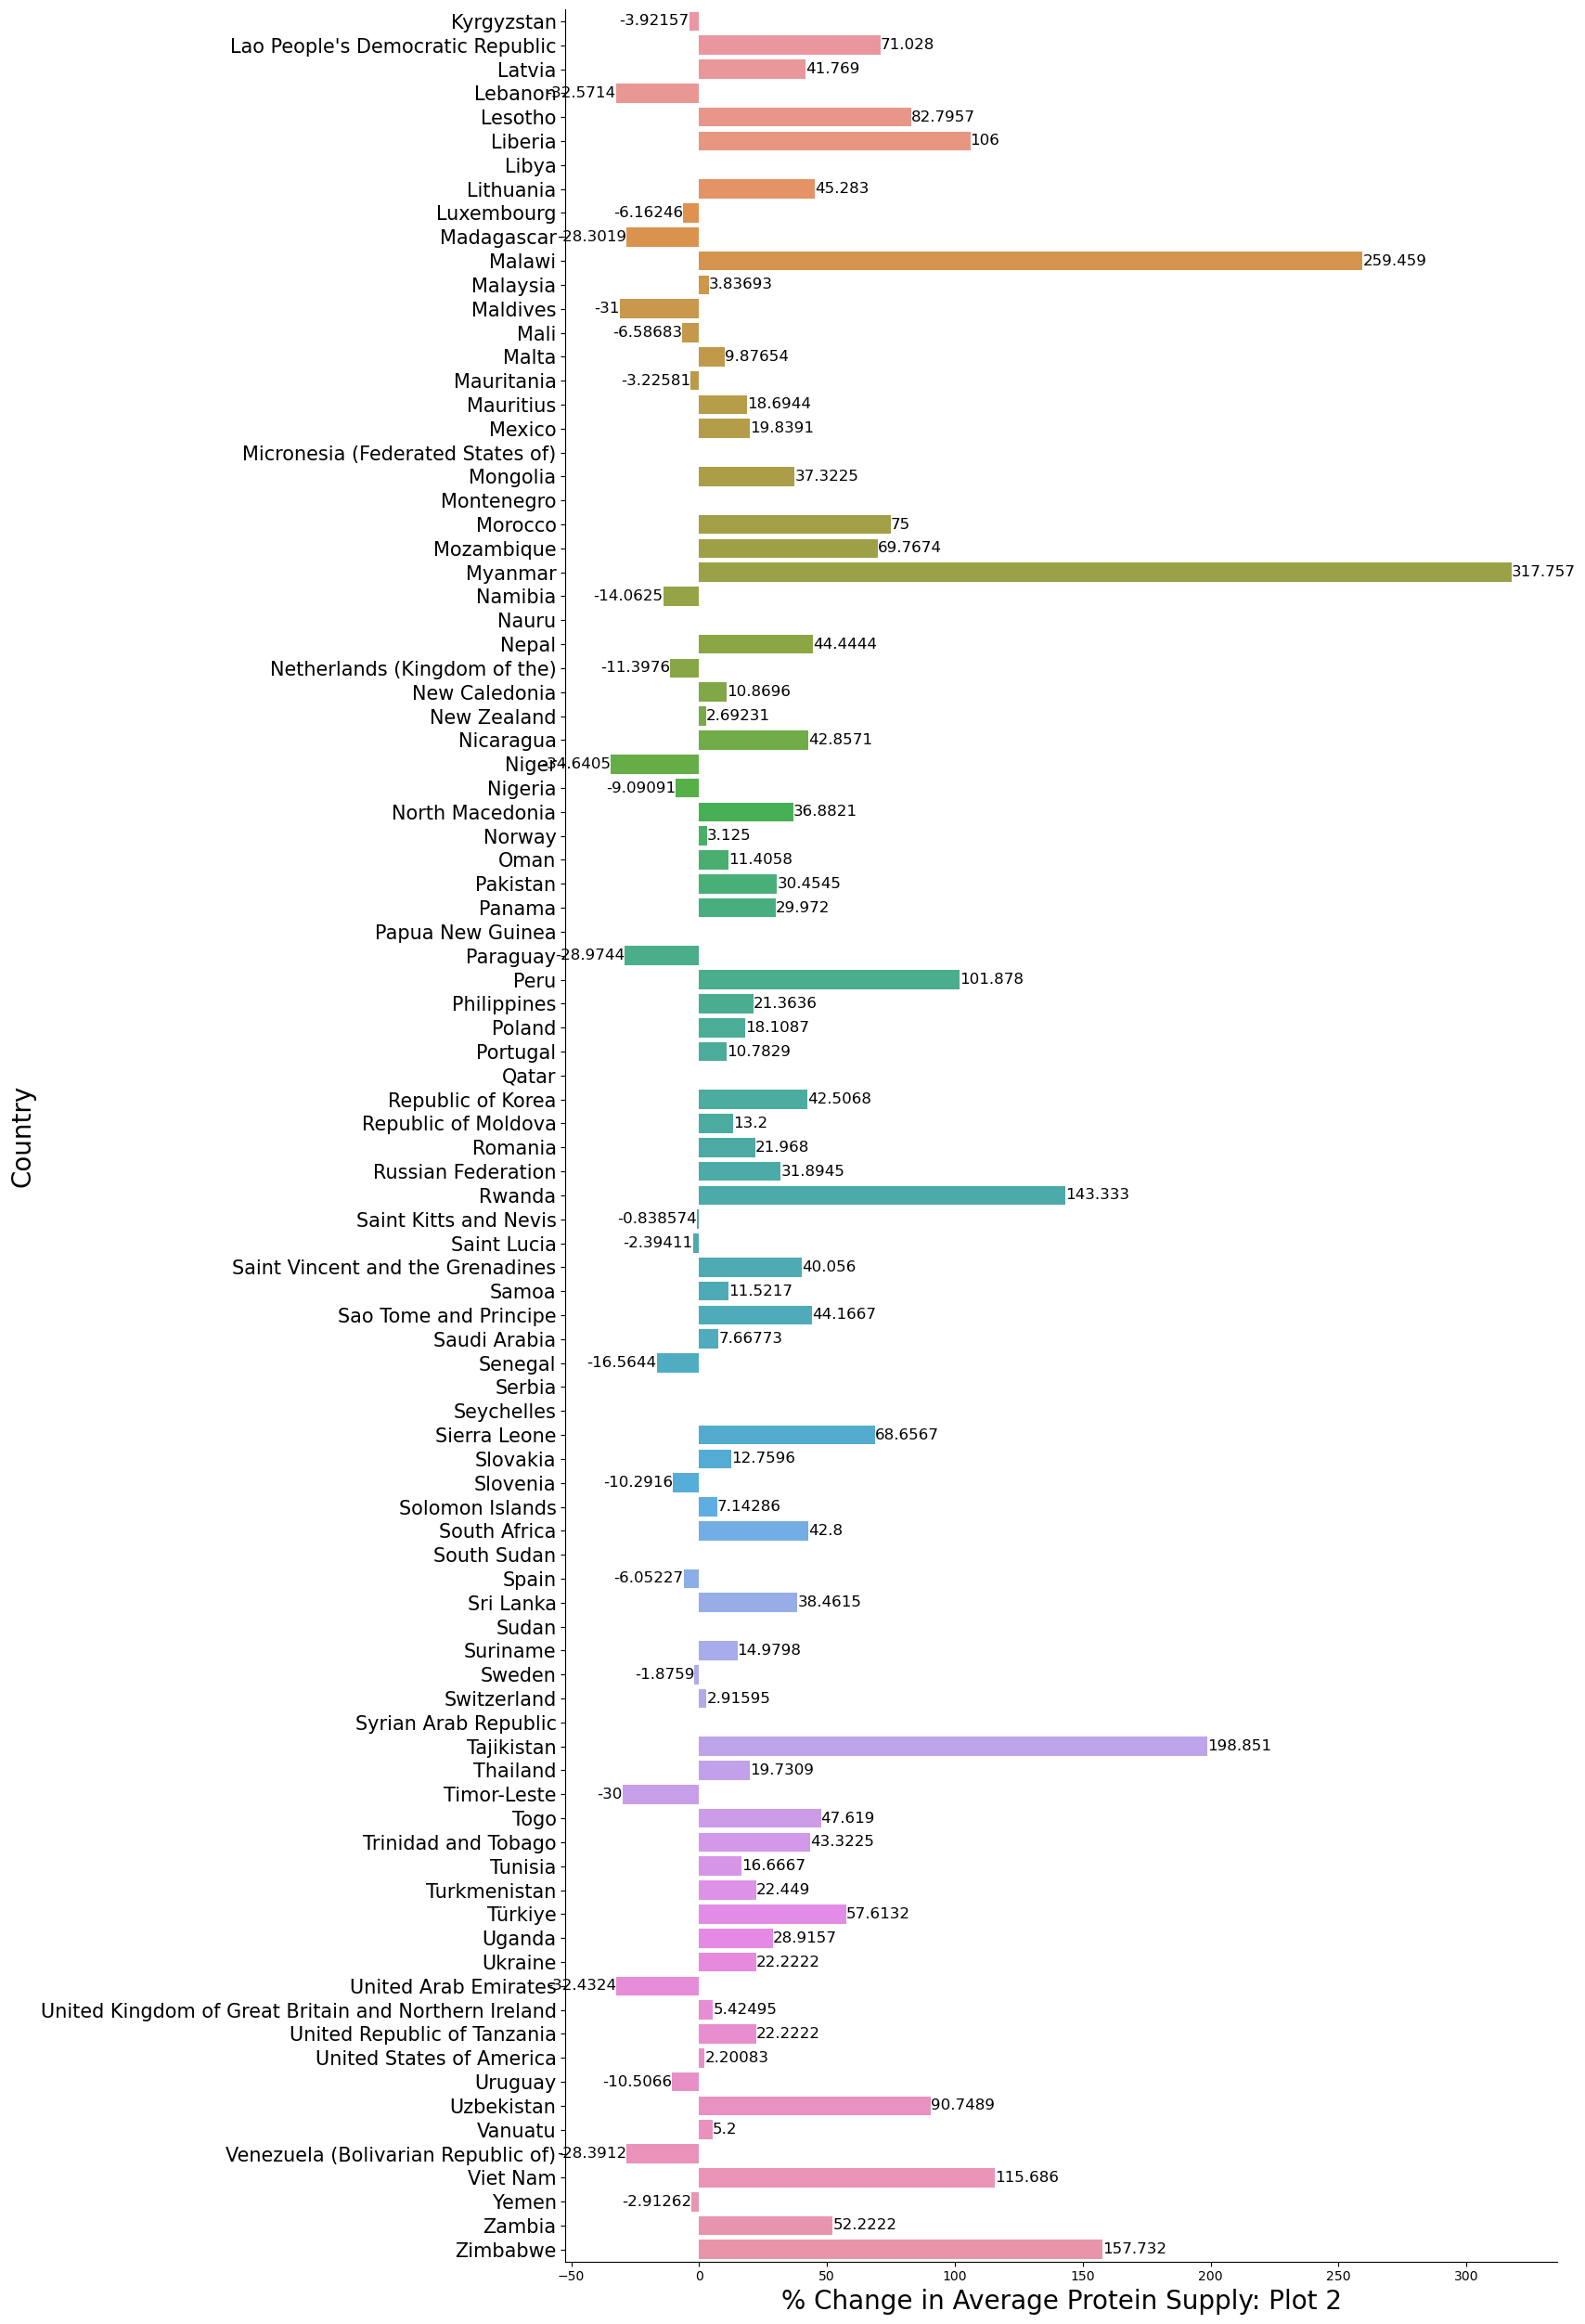

In [87]:
# Create the catplot with 'Country' and 'Percentage_Increase' columns
fig1 = sns.catplot(y='Area', x='Percentage_Increase',height = 25, aspect = 0.6, data=df_pivot[94:], kind='bar')
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fig1.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [v.get_height() for v in c]
    ax.bar_label(c, label_type='edge', fontsize = 12)


# Set labels and title
plt.ylabel('Country', fontsize = 20)
plt.xlabel('% Change in Average Protein Supply: Plot 2',fontsize = 20)

plt.yticks(fontsize=15)

# plt.savefig("Percentage_Change_Avg_Protein_Supply_Plot2.eps", dpi = 300)
plt.savefig("Percentage_Change_Avg_Protein_Supply_Plot2.svg")


# Display the plot
plt.show()

In [88]:
df_pivot.reset_index()
print(df_pivot[df_pivot['Percentage_Increase'] > 0].count())
print(df_pivot[df_pivot['Percentage_Increase'] < 0].count())

Last_Year
Area                   125
2002                   125
2019                   125
Percentage_Increase    125
dtype: int64
Last_Year
Area                   44
2002                   44
2019                   44
Percentage_Increase    44
dtype: int64
